## Import Required Dependencies

In [10]:
import tensorflow as tf
from keras import layers, models
from keras.datasets import cifar10
import matplotlib.pyplot as plt

## Load the Dataset

In [11]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Normalize the pixel values to between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## Creating the Model

In [12]:
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolution Layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatter the output before feeding to the dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Output layer for 10 classes

## Compile the model

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##Fit the Model

In [14]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3067 - loss: 1.8604 - val_accuracy: 0.4747 - val_loss: 1.4424
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5180 - loss: 1.3335 - val_accuracy: 0.5571 - val_loss: 1.2403
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5843 - loss: 1.1720 - val_accuracy: 0.6162 - val_loss: 1.0907
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6290 - loss: 1.0496 - val_accuracy: 0.6440 - val_loss: 1.0299
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6570 - loss: 0.9746 - val_accuracy: 0.6553 - val_loss: 0.9980
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6777 - loss: 0.9191 - val_accuracy: 0.6518 - val_loss: 0.9783
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6992 - loss: 0.8561 - val_accuracy: 0.6567 - val_loss: 0.9759
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7152 - loss: 0.8194 - val_accuracy: 0.

## Calculate Accuracy

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6783 - loss: 0.9264
Test accuracy: 0.675000011920929


## Visual Representation

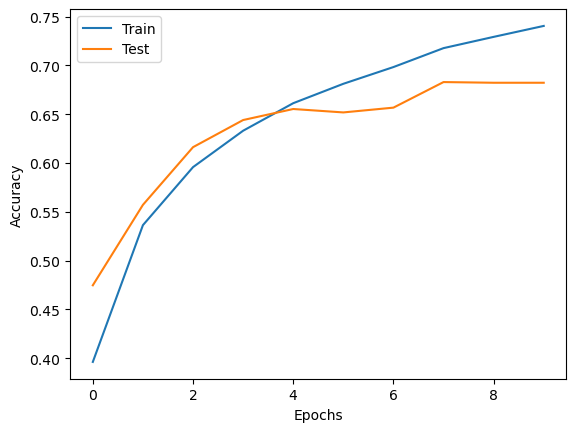

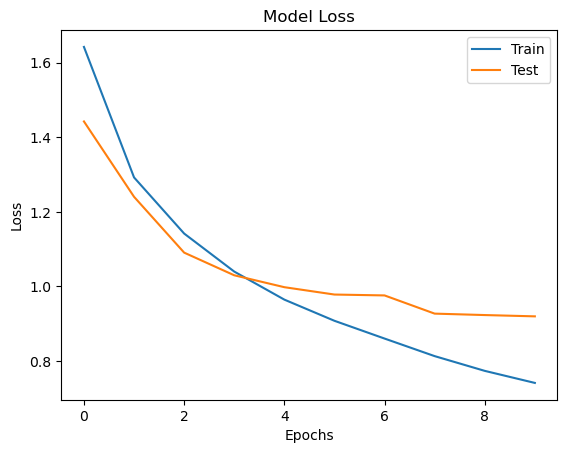

In [16]:
# Plot training and validation accuracy values
import matplotlib.pyplot as plt
# plt.figure(figsize = (12,6))
#plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & Validation loss values
#plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Making Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


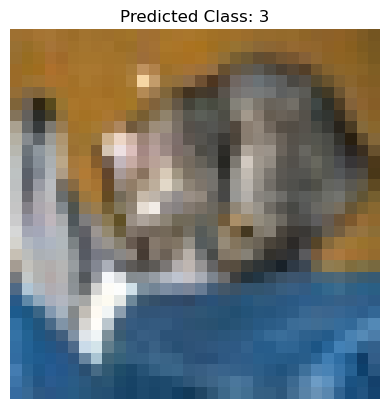

In [17]:
# Make Predictions on test data
predictions = model.predict(x_test)

# Display the first image and its predicted class
plt.imshow(x_test[0])
plt.title(f'Predicted Class: {predictions[0].argmax()}')
plt.axis('off')
plt.show()